In [11]:
import pandas as pd
import numpy as np
from pyod.models.mcd import MCD
import matplotlib.pyplot as plt
%run Data_manipulation.ipynb

In [23]:
# MCD

def detect_anomalies(df):

    # Selecting the 'Close' column for anomaly detection
    data = df[['Close']].values

    # Initialize the Fast-MCD model
    mcd = MCD()
    mcd.fit(data)

    # Predict the anomaly scores, 90 percentile as threshold
    anomaly_scores = mcd.decision_function(data)
    anomaly_threshold = np.percentile(anomaly_scores, 90)  
    anomalies = df[anomaly_scores > anomaly_threshold]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies



# NIFTY

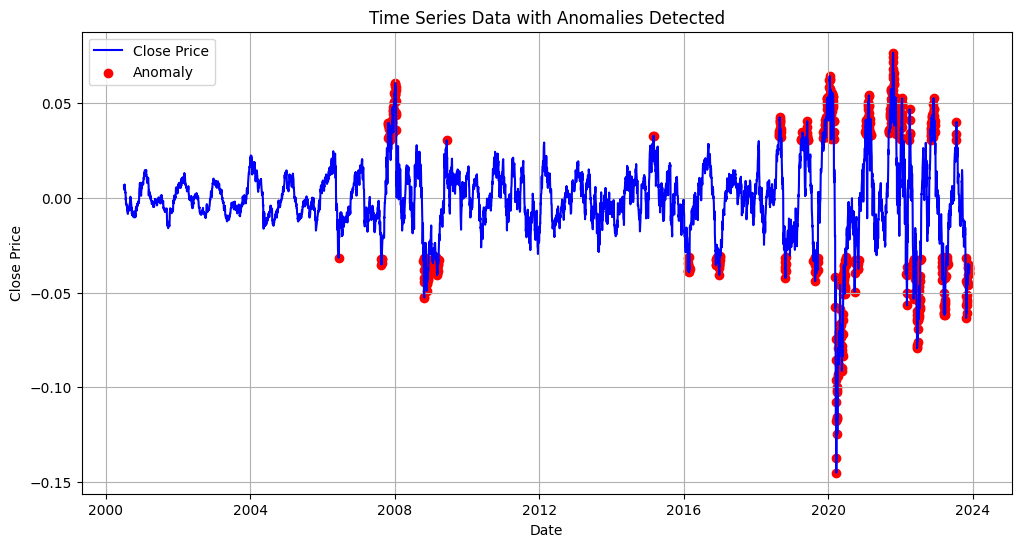

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2006-06-14,-0.031669,-0.030208,-0.026835,-0.032109,0.013438
2007-08-17,-0.032482,-0.028911,-0.031745,-0.034356,0.004804
2007-08-21,-0.035281,-0.029325,-0.030639,-0.032889,-0.029881
2007-08-22,-0.032475,-0.034357,-0.033788,-0.034437,-0.013328
2007-08-23,-0.034321,-0.032228,-0.030500,-0.032936,0.008480
...,...,...,...,...,...
2023-11-21,-0.037579,-0.037538,-0.038580,-0.034906,-0.051866
2023-11-22,-0.037141,-0.038078,-0.039235,-0.038410,-0.051526
2023-11-23,-0.039001,-0.037942,-0.038741,-0.035780,-0.058027


In [24]:
# Detecting anomaly
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

In [25]:
import matplotlib.pyplot as plt

def plot_with_anomalies(df, anomalies_df, interval):
    # Assuming 'Date' is in datetime format and set as index for the nifty_df dataframe
    #anomalies_df['Date'] = pd.to_datetime(anomalies_df['Date'])
    #anomalies_df.set_index('Date', inplace=True)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

    # Define the start and end years
    start_year = 2000
    end_year = 2025

    # Loop through each 2-year segment and plot the data
    for year in range(start_year, end_year, interval):
        start_date = f"{year}-01-01"
        end_date = f"{year + interval - 1}-12-31"
        
        # Slice the data for the current year segment
        segment = df[start_date:end_date]
        anomalies_in_segment = anomalies_df[start_date:end_date]

        # Plot the current segment
        plt.figure(figsize=(12, 6))
        plt.plot(segment.index, segment['Close'], label="Close Price", color='blue')
        
        # Mark anomalies
        plt.scatter(anomalies_in_segment.index, segment.loc[anomalies_in_segment.index]['Close'], color='red', label='Anomaly')
        
        # Plot settings
        plt.title(f'Data with Anomalies ({year}-{year + interval - 1})')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()


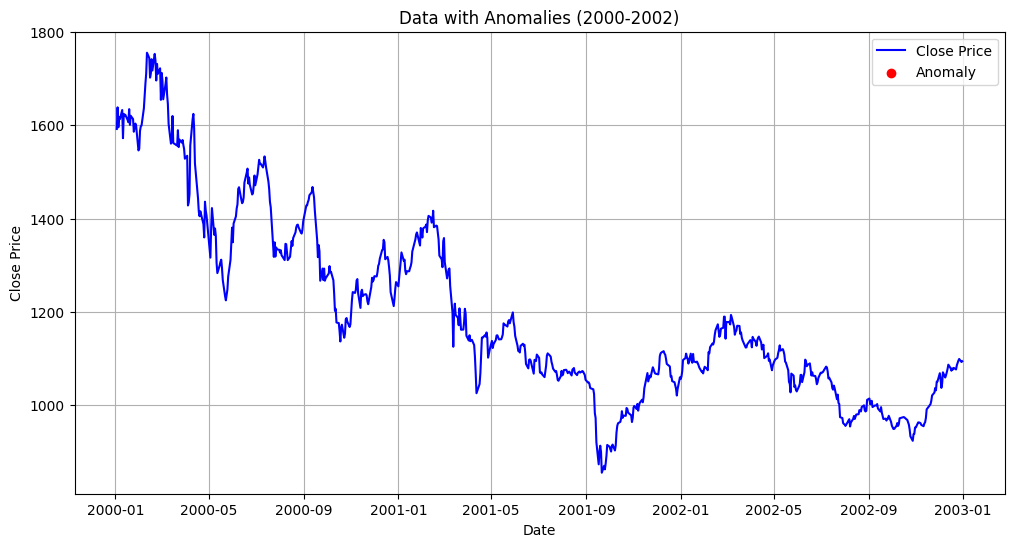

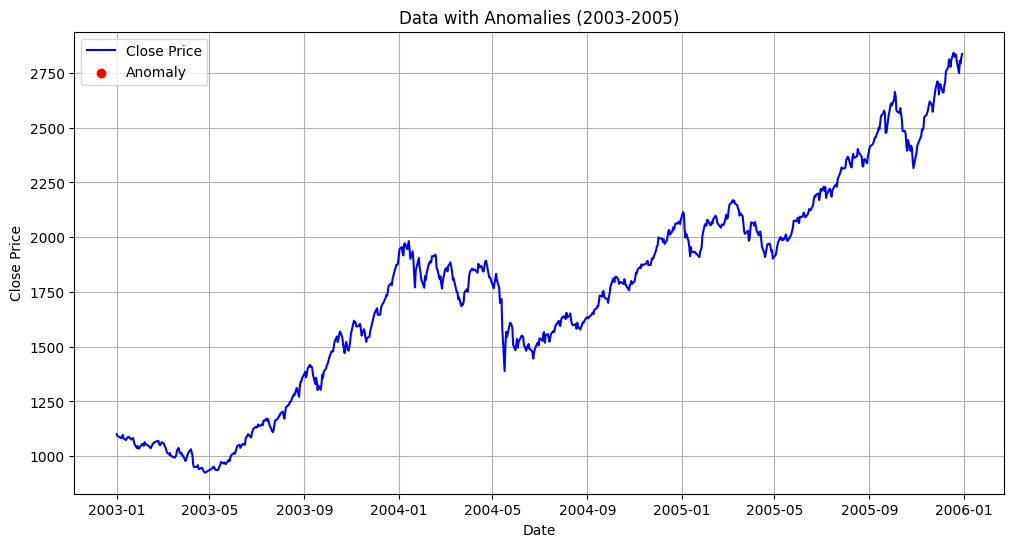

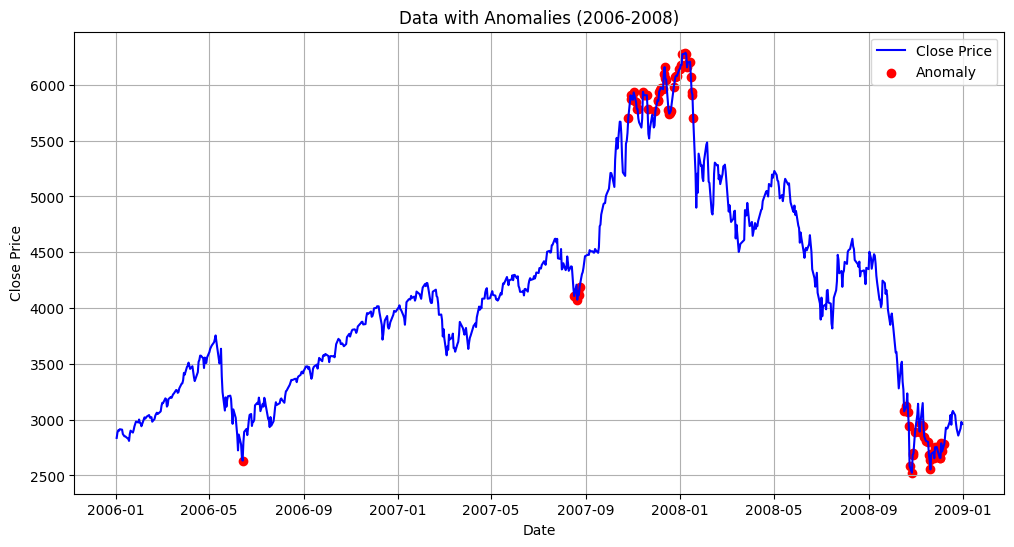

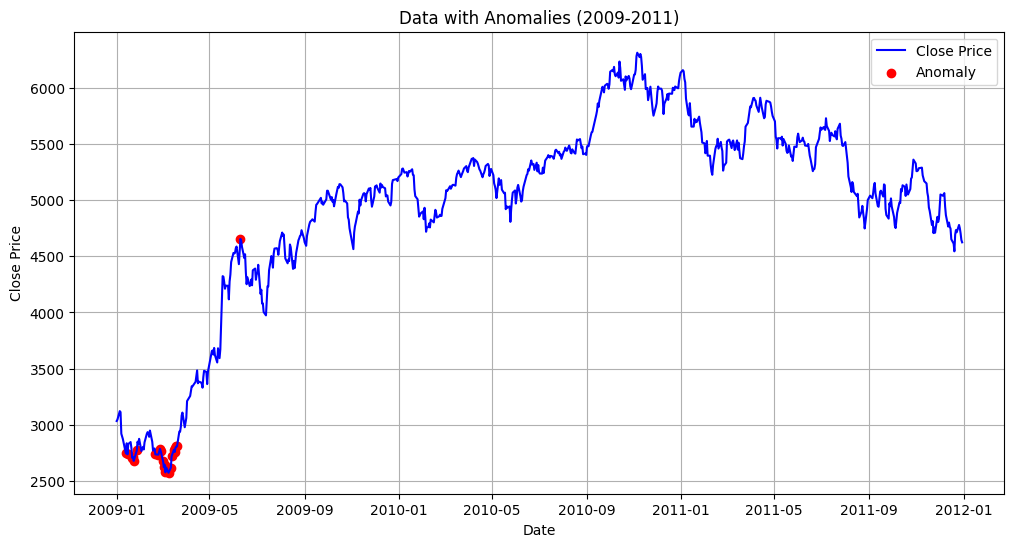

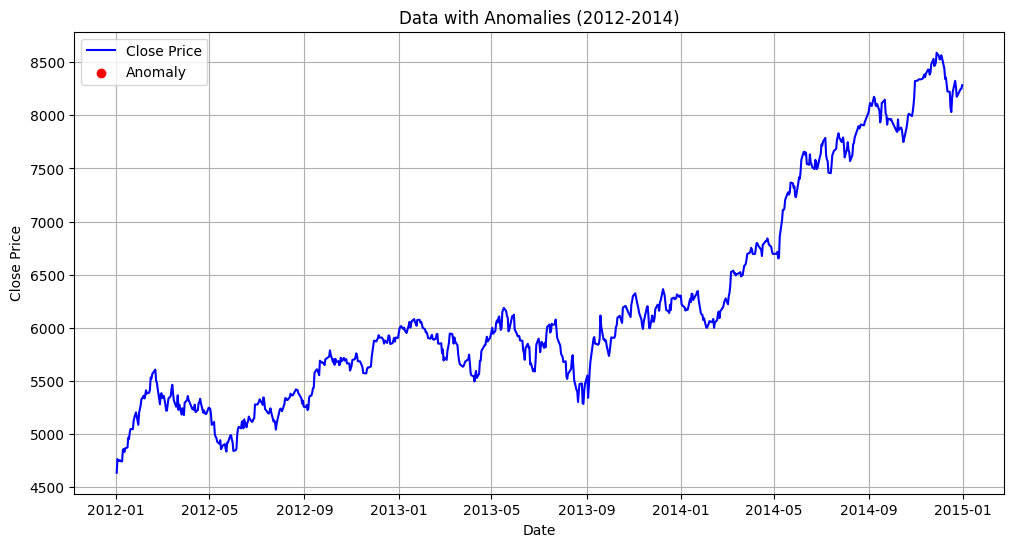

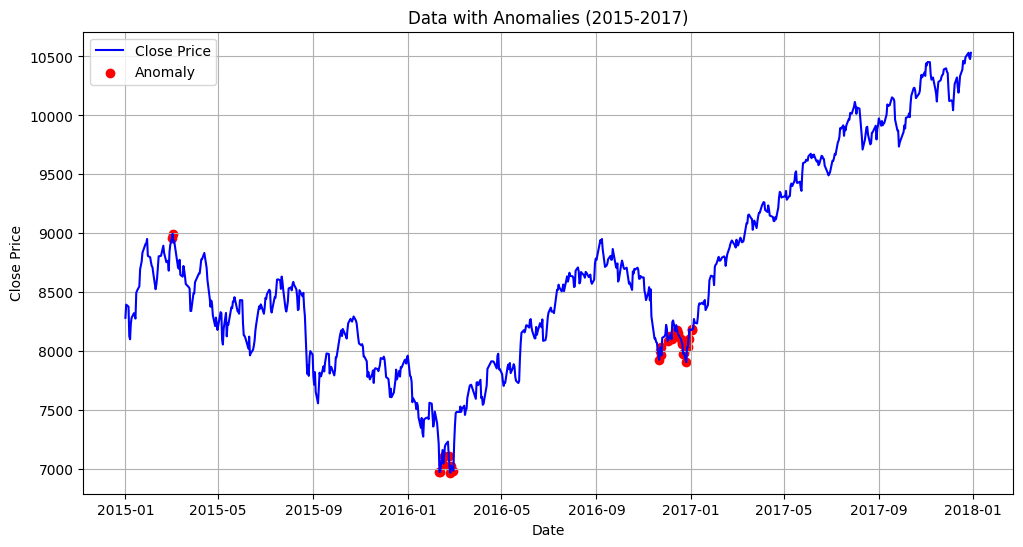

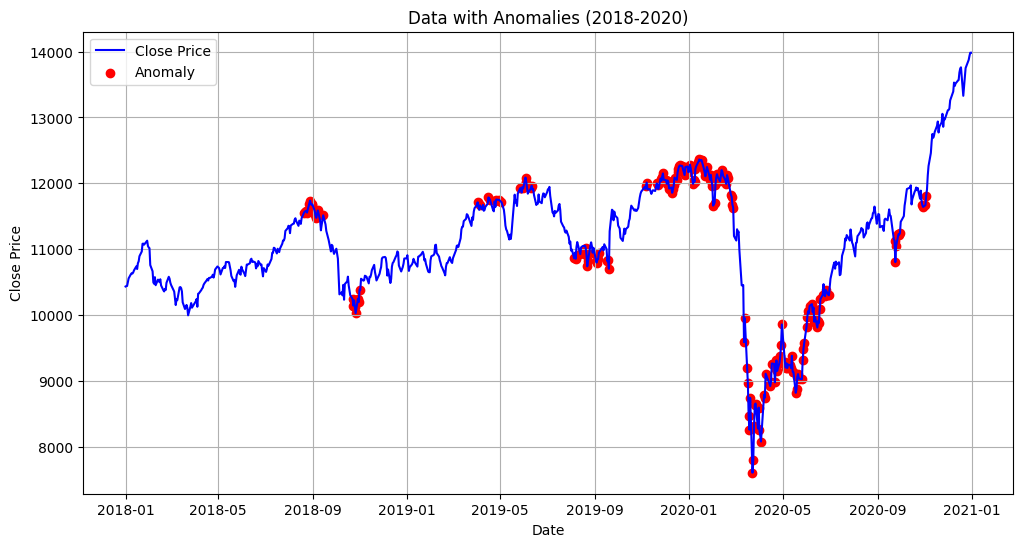

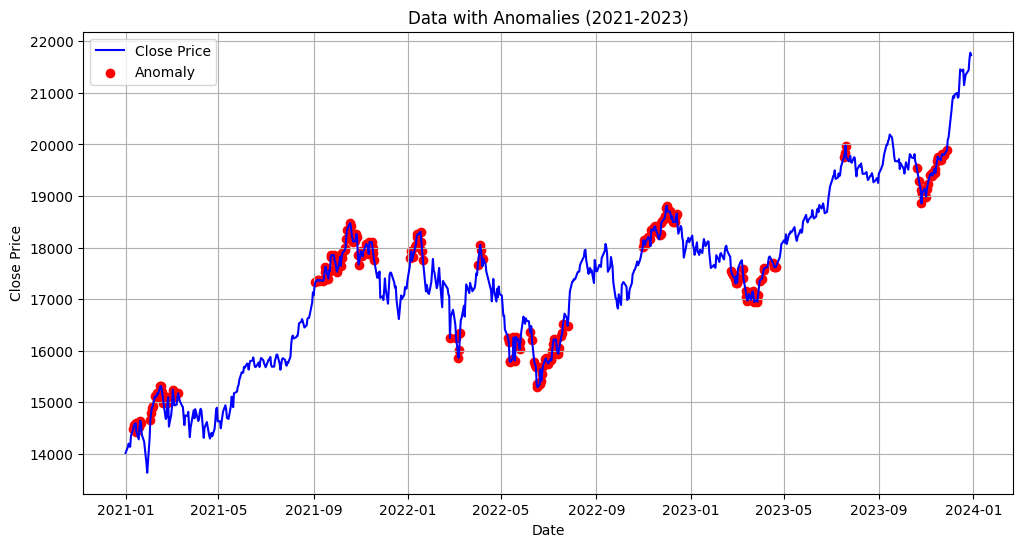

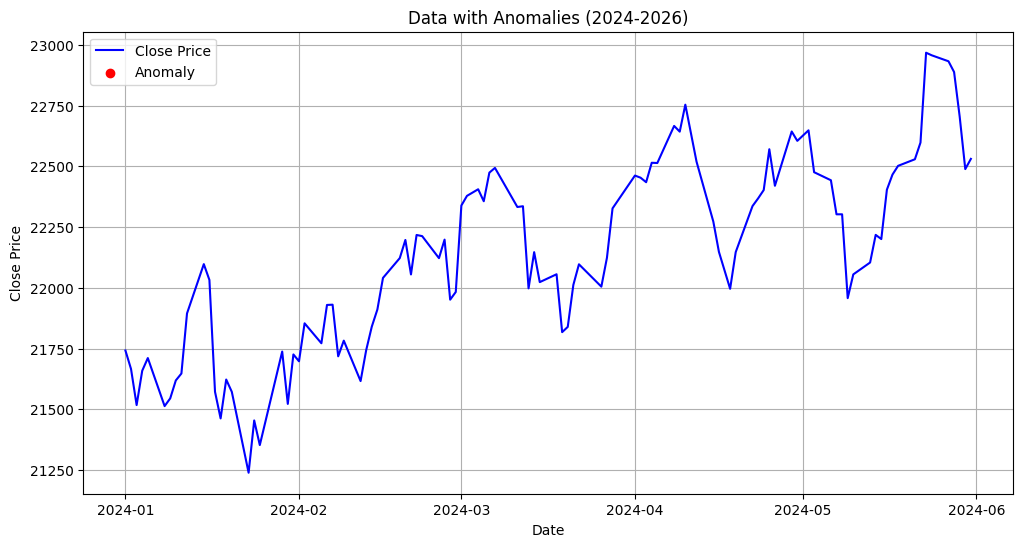

In [26]:
NIFTY_3 = plot_with_anomalies(NIFTY, anomalies, interval=3)

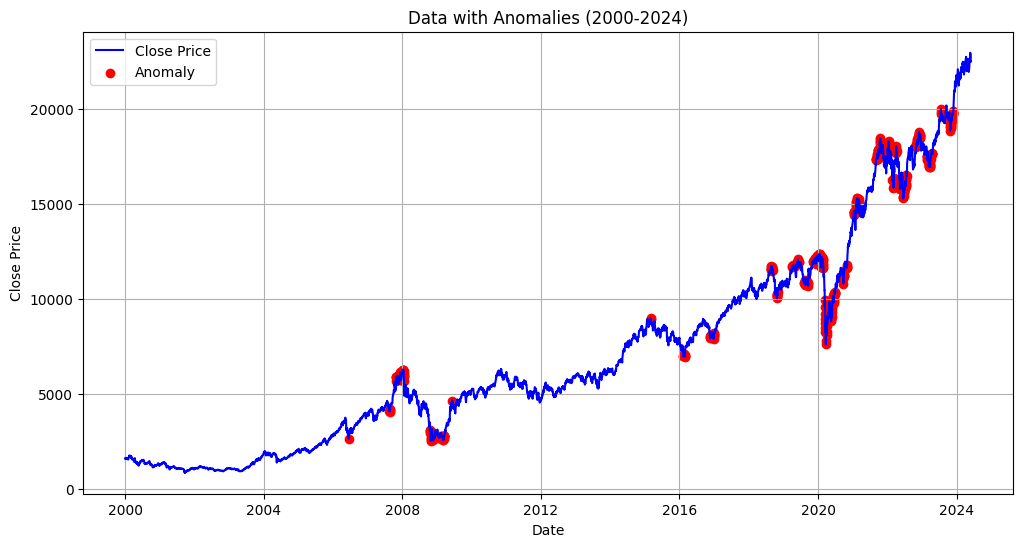

In [27]:
NIFTY_all = plot_with_anomalies(NIFTY, anomalies, interval = 25)

# IBOVESPA

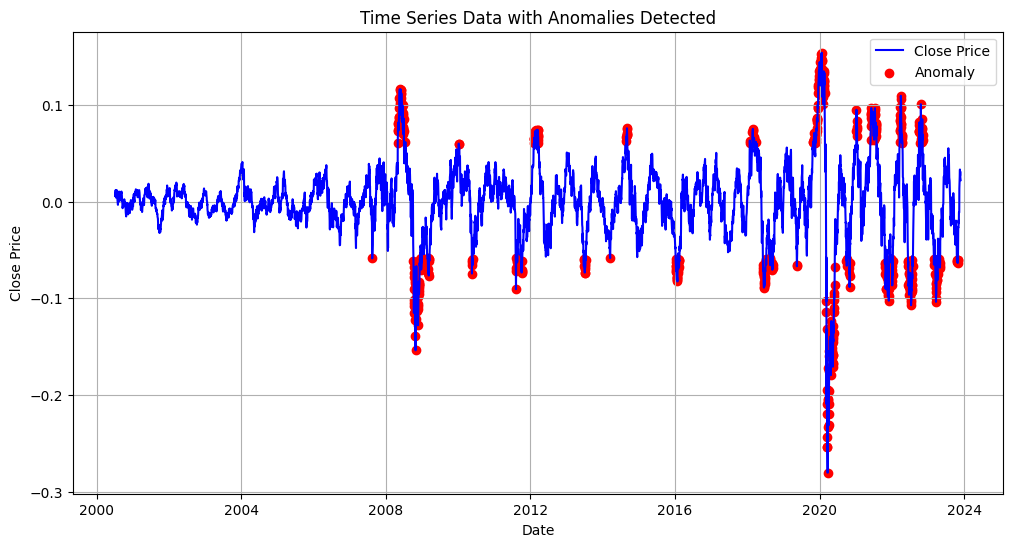

Anomalies:


,Open,High,Low,Close,Volume (in Million)
Date,,,,,
2007-08-16,-0.048141,-0.052953,-0.077444,-0.058693,0.173260
2008-04-30,0.028714,0.055163,0.036530,0.060693,-0.011775
2008-05-02,0.060720,0.078027,0.069101,0.074189,-0.010925
2008-05-05,0.074201,0.076329,0.081243,0.080705,0.000315
2008-05-06,0.080727,0.074670,0.083875,0.081755,0.000304
...,...,...,...,...,...
2023-10-23,-0.060048,-0.061772,-0.061264,-0.061760,0.007320
2023-10-25,-0.056669,-0.058990,-0.057158,-0.062759,0.013231
2023-10-27,-0.048758,-0.050532,-0.056537,-0.059873,0.015573


In [28]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

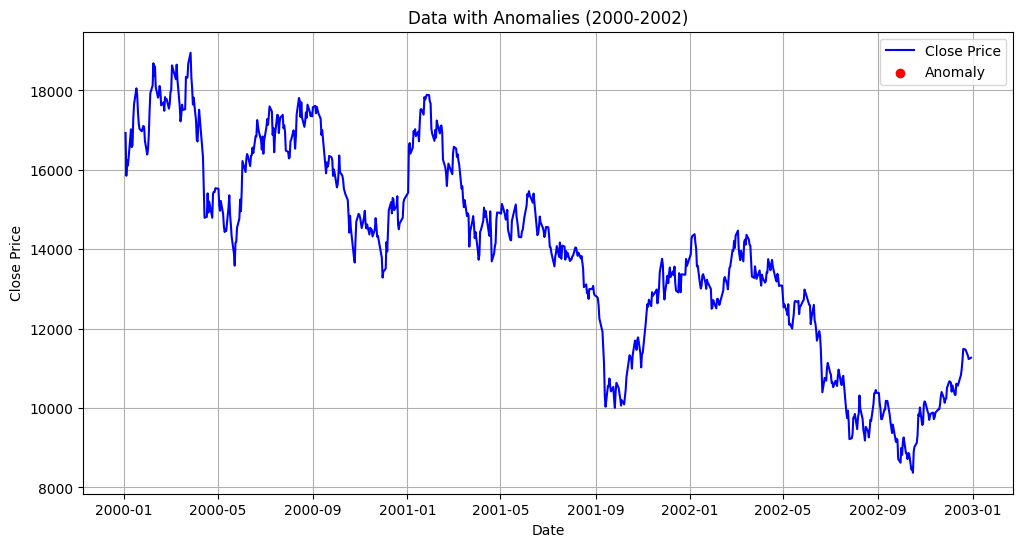

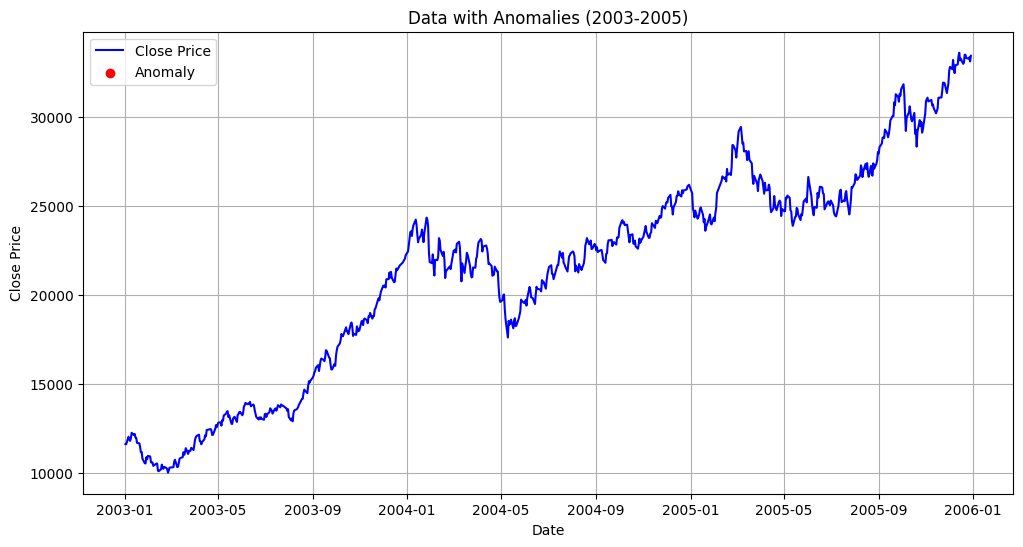

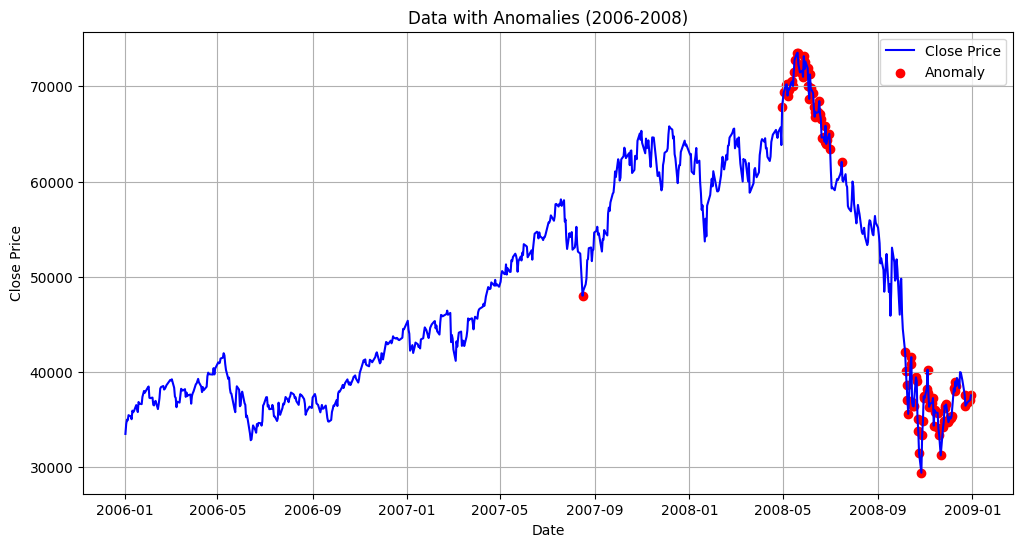

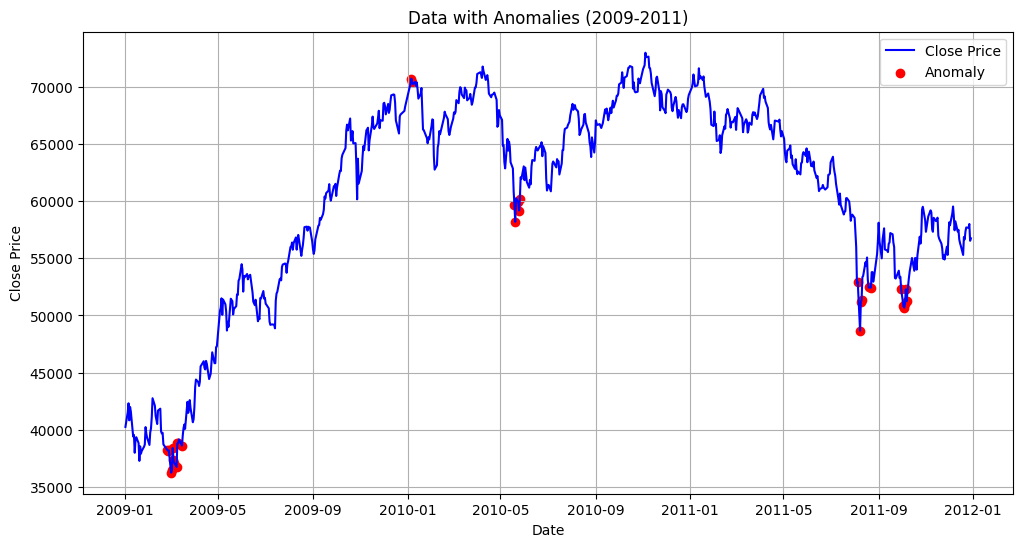

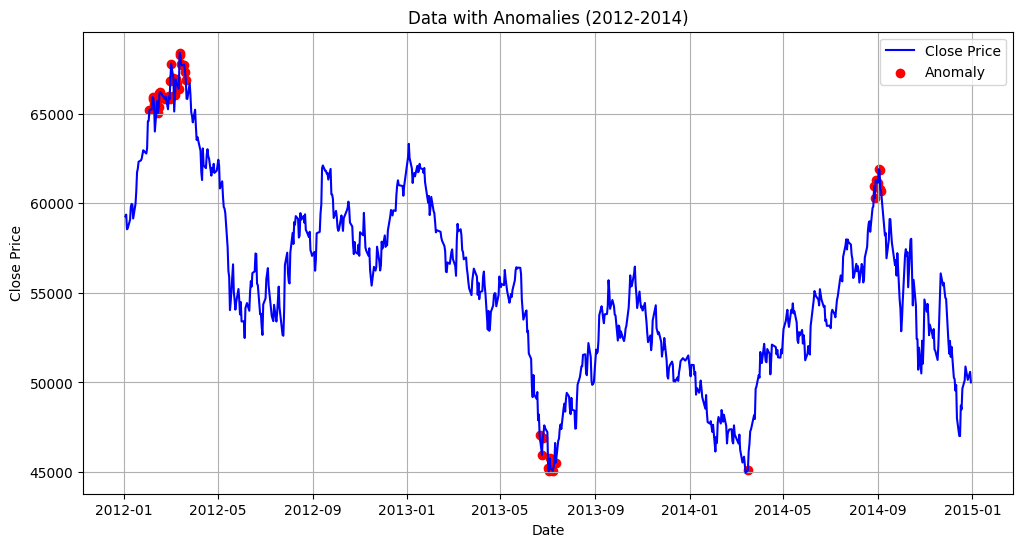

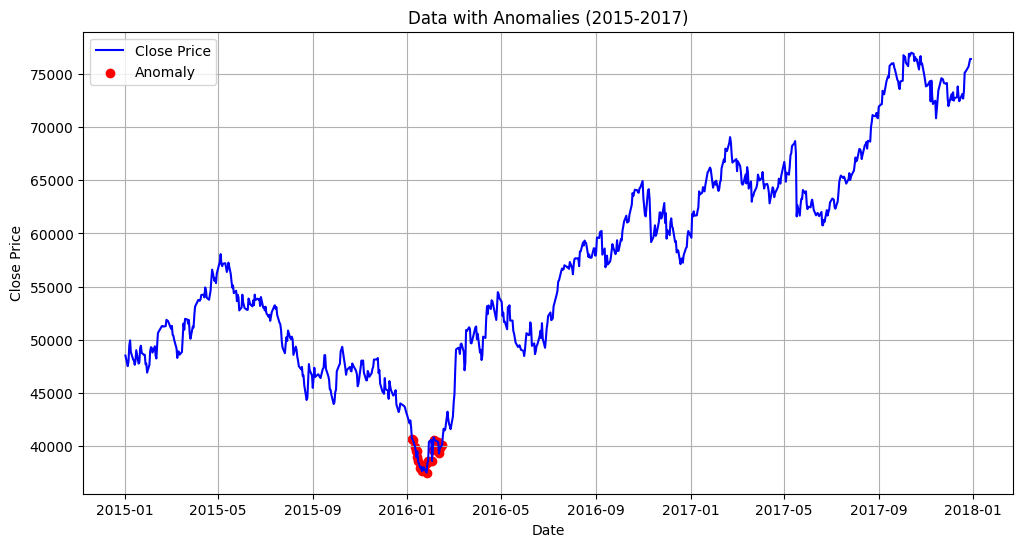

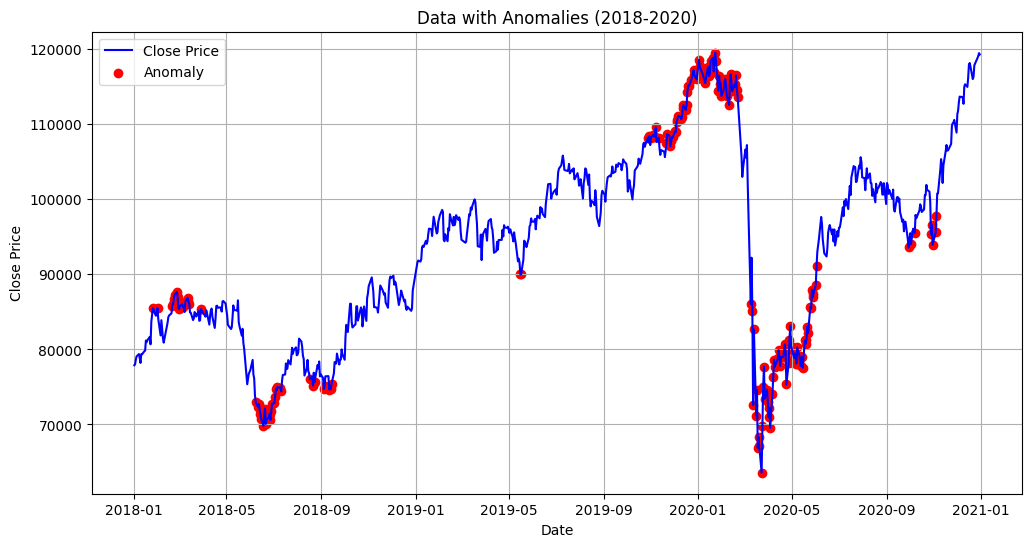

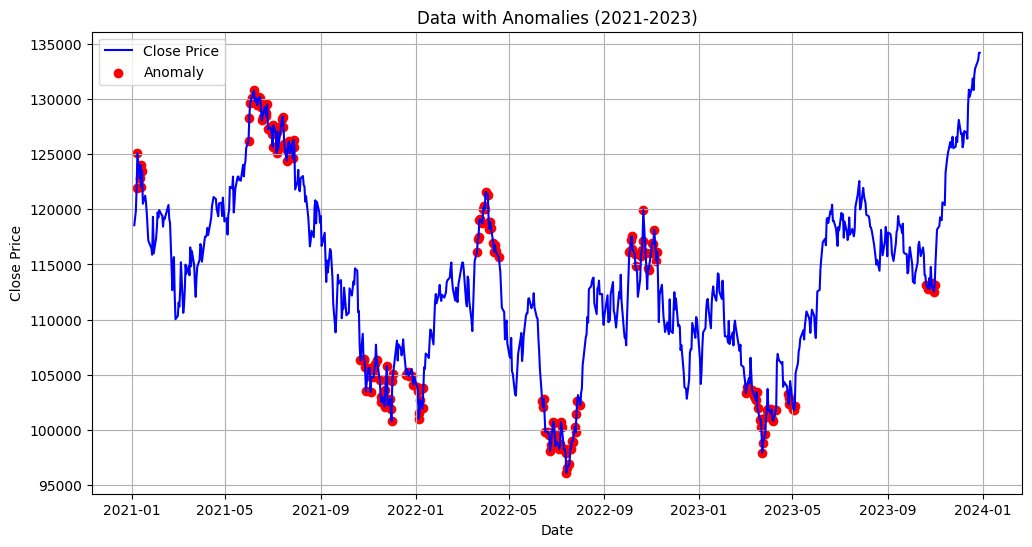

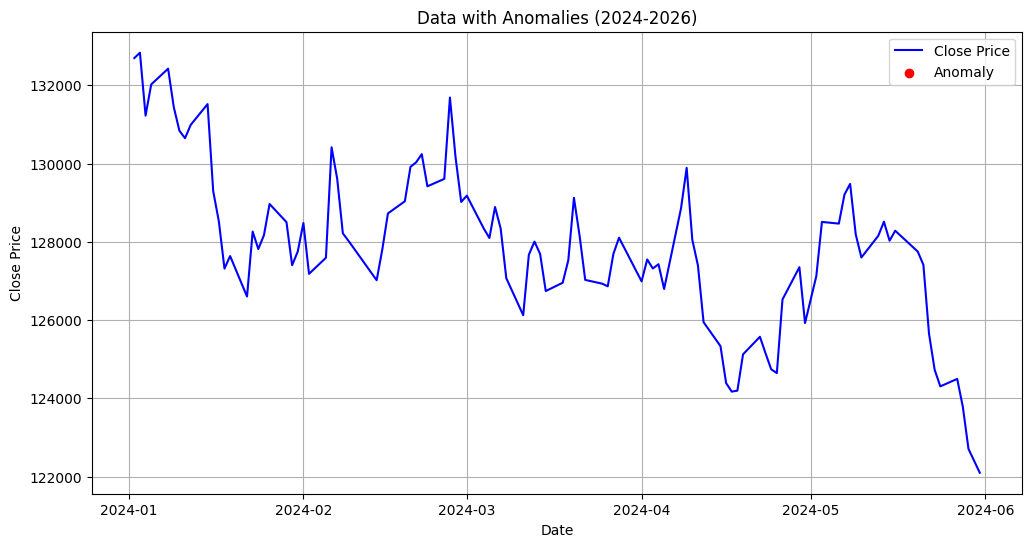

In [29]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, interval=3)

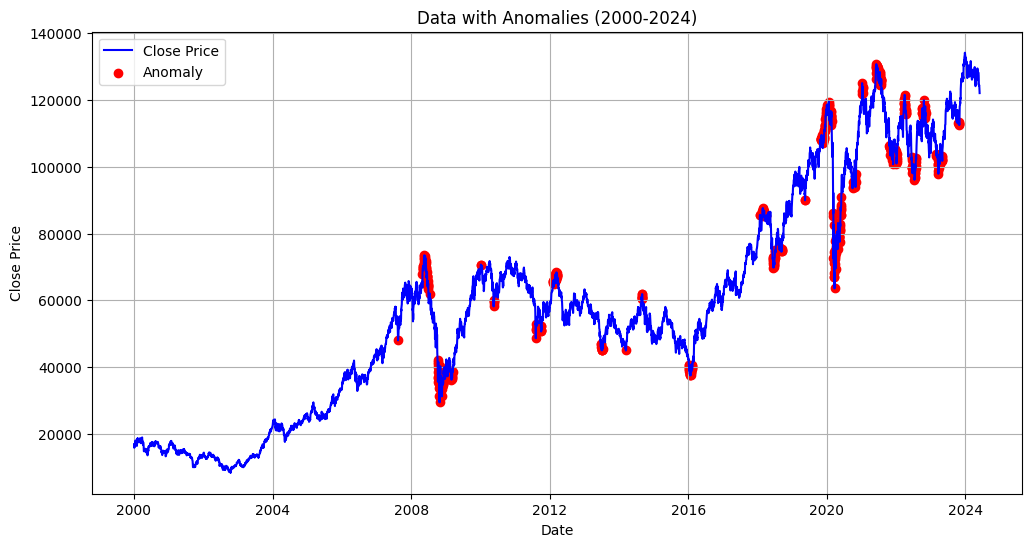

In [30]:
IBOV_all = plot_with_anomalies(IBOV, anomalies, 25)